# 🐔 WWT Unravel 2025 – Recommendation Algorithm for Wings R Us
**Team:** DisCovert

## 📌 Introduction
This notebook contains the full data exploration and preprocessing pipeline for the **WWT Unravel 2025** case competition.

**Client:** Wings R Us – a US-based quick service restaurant (QSR) specializing in chicken wings, sides, and beverages.

**Goal:** Build a **personalized last-minute item recommendation system** for the checkout stage to:
- Increase average order value (AOV)
- Improve customer retention
- Keep recommendations fresh and relevant

## 📄 Problem Statement (From Case File)

Wings R Us wants to enhance its **digital checkout experience** by introducing **smart, last-minute recommendations** across its app, website, and kiosks.

### Business Notes:
- Use available data to identify **customer signals** that drive recommendations
- Serve a **diverse customer base** (first-timers, loyal customers, special members)
- Recommendations should **avoid repetition** and feel **fresh**
- Define and measure success — metrics like **Recall@3**

### Provided Datasets:
1. **order_data** – 1.4M orders with customer, store, channel, and order details (JSON format for items)
2. **customer_data** – 550K customers with type classification
3. **store_data** – 38 stores with city, state, postal info
4. **test_data_question** – 1K sample carts with one item missing for scoring

### Step 1: Code execution

In [ ]:
#pip install tqdm

### Step 2: Code execution

In [ ]:
# pip install tqdm

import pandas as pd
import numpy as np
import json
from tqdm import tqdm

### Step 3: Load datasets into DataFrames

In [ ]:
# Load the main datasets
order_data = pd.read_csv('order_data.csv')
customer_data = pd.read_csv('customer_data.csv')
store_data = pd.read_csv('store_data.csv')
test_data = pd.read_csv('test_data_question.csv')

### Step 4: Code execution

In [ ]:
# Display basic info about each dataset
print("Order Data Shape:", order_data.shape)
print("Customer Data Shape:", customer_data.shape)
print("Store Data Shape:", store_data.shape)
print("Test Data Shape:", test_data.shape)

Order Data Shape: (1414410, 8)
Customer Data Shape: (563346, 2)
Store Data Shape: (38, 4)
Test Data Shape: (1000, 10)


### Step 5: Code execution

In [ ]:
# Display heads
order_data.head()


,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDERS,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME
0,362204699,2156,2024-07-24,7247194287,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo
1,269612955,1419,2025-02-15,791214421,"{""orders"": [{""item_details"": [{""item_name"": ""R...",Digital,WWT,ToGo
2,585330633,2249,2025-02-15,7575285208,"{""orders"": [{""item_details"": [{""item_name"": ""2...",Digital,WWT,ToGo
3,950661333,2513,2024-03-29,4253875716,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo
4,434985772,1754,2024-04-08,7150407872,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo


### Step 6: Code execution

In [ ]:
customer_data.head()

,CUSTOMER_ID,CUSTOMER_TYPE
0,362204699,Registered
1,269612955,Registered
2,585330633,Guest
3,950661333,Registered
4,434985772,Guest


### Step 7: Code execution

In [ ]:
store_data.head()

,STORE_NUMBER,CITY,STATE,POSTAL_CODE
0,2156,GRAPEVINE,TX,76051
1,1419,HUNTERSVILLE,NC,28078
2,2249,NaN,NaN,32792
3,2513,LAS VEGAS,NV,89129
4,1754,ARDMORE,OK,73401


### Step 8: Code execution

In [ ]:
test_data.head()

,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,CUSTOMER_TYPE,item1,item2,item3
0,997177535,4915,9351345556,Digital,WWT,ToGo,Guest,Chicken Sub Combo,Ranch Dip - Regular,10 pc Spicy Wings Combo
1,345593831,949,3595377080,Digital,WWT,ToGo,Registered,Regular Buffalo Fries,10 pc Spicy Wings,3 pc Crispy Strips Combo
2,160955031,2249,4071757785,Digital,WWT,ToGo,Guest,Large Buffalo Fries,10 pc Spicy Wings,Ranch Dip - Regular
3,890671991,4154,3931766769,Digital,WWT,ToGo,Guest,6 pc Grilled Wings Combo,20 pc Grilled Wings,Fried Corn - Large
4,73989021,4094,3739700809,Digital,WWT,ToGo,Registered,Regular Buffalo Fries,20 pc Grilled Wings,Ranch Dip - Large


### Step 9: Display dataset information

In [ ]:
# Display info
print(order_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414410 entries, 0 to 1414409
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   CUSTOMER_ID            1414410 non-null  int64 
 1   STORE_NUMBER           1414410 non-null  int64 
 2   ORDER_CREATED_DATE     1414410 non-null  object
 3   ORDER_ID               1414410 non-null  int64 
 4   ORDERS                 1414410 non-null  object
 5   ORDER_CHANNEL_NAME     1414410 non-null  object
 6   ORDER_SUBCHANNEL_NAME  1414410 non-null  object
 7   ORDER_OCCASION_NAME    1414410 non-null  object
dtypes: int64(3), object(5)
memory usage: 86.3+ MB
None


### Step 10: Display dataset information

In [ ]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563346 entries, 0 to 563345
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CUSTOMER_ID    563346 non-null  int64 
 1   CUSTOMER_TYPE  563319 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6+ MB
None


### Step 11: Display dataset information

In [ ]:
print(store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STORE_NUMBER  38 non-null     int64 
 1   CITY          25 non-null     object
 2   STATE         24 non-null     object
 3   POSTAL_CODE   36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB
None


### Step 12: Display dataset information

In [ ]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSTOMER_ID            1000 non-null   int64 
 1   STORE_NUMBER           1000 non-null   int64 
 2   ORDER_ID               1000 non-null   int64 
 3   ORDER_CHANNEL_NAME     1000 non-null   object
 4   ORDER_SUBCHANNEL_NAME  1000 non-null   object
 5   ORDER_OCCASION_NAME    1000 non-null   object
 6   CUSTOMER_TYPE          1000 non-null   object
 7   item1                  1000 non-null   object
 8   item2                  1000 non-null   object
 9   item3                  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB
None


### Step 13: Check for missing values

In [ ]:
# Display missing values
print("🧩 Missing Values:")
print(order_data.isnull().sum())

🧩 Missing Values:
CUSTOMER_ID              0
STORE_NUMBER             0
ORDER_CREATED_DATE       0
ORDER_ID                 0
ORDERS                   0
ORDER_CHANNEL_NAME       0
ORDER_SUBCHANNEL_NAME    0
ORDER_OCCASION_NAME      0
dtype: int64


### Step 14: Check for missing values

In [ ]:
print("🧩 Missing Values:")
print(customer_data.isnull().sum())

🧩 Missing Values:
CUSTOMER_ID       0
CUSTOMER_TYPE    27
dtype: int64


### Step 15: Check for missing values

In [ ]:
print("🧩 Missing Values:")
print(store_data.isnull().sum())

🧩 Missing Values:
STORE_NUMBER     0
CITY            13
STATE           14
POSTAL_CODE      2
dtype: int64


### Step 16: Check for missing values

In [ ]:
import textwrap

# DataFrames to analyze
datasets = {
    "order_data": order_data,
    "customer_data": customer_data,
    "store_data": store_data,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 36

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"

    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])

    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")

    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <39)"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== order_data ====
Column Name                   Missing Values Unique Count   Unique Values (if <39)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_CREATED_DATE            0              446            
ORDER_ID                      0              1414410        
ORDERS                        0              735527         
ORDER_CHANNEL_NAME            0              1              Digital
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery

==== customer_data ====
Column Name                   Missing Values Unique Count   Unique Values (if <39)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
CUSTOMER_TYPE             

### Step 17: Parse and process ORDERS JSON data

In [ ]:
# Detect JSON columns
def detect_json_columns(df, df_name):
    json_cols = []
    for col in df.columns:
        sample = df[col].dropna().astype(str).iloc[0]  # take first non-null as string
        try:
            parsed = json.loads(sample)
            if isinstance(parsed, (dict, list)):
                json_cols.append(col)
        except:
            continue
    print(f"JSON-like columns in {df_name}: {json_cols if json_cols else 'None'}")

detect_json_columns(order_data, "order_data")
detect_json_columns(customer_data, "customer_data")
detect_json_columns(store_data, "store_data")
detect_json_columns(test_data, "test_data")

JSON-like columns in order_data: ['ORDERS']
JSON-like columns in customer_data: None
JSON-like columns in store_data: None
JSON-like columns in test_data: None


### Step 18: Parse and process ORDERS JSON data

In [ ]:
# 🔍 Extract and print all unique item_name values before generating wide_df
unique_item_names = set()

for idx, row in tqdm(order_data.iterrows(), total=len(order_data), desc='Extracting unique item_name values'):
    try:
        orders_field = row['ORDERS']
        if isinstance(orders_field, str):
            order_json = json.loads(orders_field)
        elif isinstance(orders_field, dict):
            order_json = orders_field
        else:
            continue

        item_details = order_json['orders'][0]['item_details']

        for item in item_details:
            item_name = item.get('item_name')
            if item_name:
                unique_item_names.add(item_name.strip())

    except Exception as e:
        print(f"Error in row {idx}: {e}")
        continue

# Print all unique item names
print(f"\n🔍 Found {len(unique_item_names)} unique item_name values:")
for name in sorted(unique_item_names):
    print(f"- {name}")

Extracting unique item_name values: 100%|██████████| 1414410/1414410 [02:02<00:00, 11574.49it/s]


🔍 Found 145 unique item_name values:
- $19.99 Crispy Feast
- 10 pc Grilled Wings
- 10 pc Grilled Wings Combo
- 10 pc Mixed Wings
- 10 pc Mixed Wings Combo
- 10 pc Spicy Wings
- 10 pc Spicy Wings Combo
- 100 pc Family Grilled Wings
- 100 pc Family Mixed Wings
- 100 pc Family Spicy Wings
- 100 pc Grilled Wings
- 100 pc Mixed Wings
- 100 pc Spicy Wings
- 15 pc Crispy Strips
- 15 pc Grilled Wings
- 15 pc Grilled Wings Combo
- 15 pc Mixed Wings
- 15 pc Mixed Wings Combo
- 15 pc Spicy Wings
- 15 pc Spicy Wings Combo
- 2 pc Crispy Strips
- 20 Oz Soda
- 20 pc Crispy Strips
- 20 pc Grilled Wings
- 20 pc Mixed Wings
- 20 pc Spicy Wings
- 20pc Spicy Feast Deal
- 24 pc Family Grilled Wings
- 24 pc Family Mixed Wings
- 24 pc Family Spicy Wings
- 25 pc Game Day Pack
- 25 pc Spicy Wings
- 3 Strips Lunch
- 3 pc Crispy Strips Combo
- 3 pc Grilled Wings
- 30 pc Crispy Strips
- 30 pc Family Grilled Wings
- 30 pc Family Mixed Wings
- 30 pc Family Spicy Wings
- 30 pc Grilled Wings
- 30 pc Mixed Wings
- 30

### Step 19: Code execution

In [ ]:
#checking if $19.99 Crispy Feast is an incorrect data where the prices column has come into the item_name column.

### Step 20: Parse and process ORDERS JSON data

In [ ]:
feast_prices = []

for idx, row in tqdm(order_data.iterrows(), total=len(order_data), desc='Checking item_price for "$19.99 Crispy Feast"'):
    try:
        orders_field = row['ORDERS']
        if isinstance(orders_field, str):
            order_json = json.loads(orders_field)
        elif isinstance(orders_field, dict):
            order_json = orders_field
        else:
            continue

        item_details = order_json['orders'][0]['item_details']

        for item in item_details:
            if item.get('item_name', '').strip() == "$19.99 Crispy Feast":
                feast_prices.append(float(item.get('item_price', 0)))

    except Exception as e:
        print(f"Error in row {idx}: {e}")
        continue

# Display results
print(f"\n🔍 Found {len(feast_prices)} entries for '$19.99 Crispy Feast'")
print("Unique item_price values for it:")
print(sorted(set(feast_prices)))

Checking item_price for "$19.99 Crispy Feast": 100%|██████████| 1414410/1414410 [01:56<00:00, 12100.33it/s]


🔍 Found 57 entries for '$19.99 Crispy Feast'
Unique item_price values for it:
[19.99, 39.98]


### Step 21: Parse and process ORDERS JSON data

In [ ]:
from tqdm import tqdm
import json

def parse_orders_to_columns(df):
    rows = []
    exclude_price = 0.0

    # Set of item names to ignore
    excluded_names = {
        'Delivery Fee',
        'Order Blankline 1',
        'Order Blankline 2',
        'Order Memo ASAP',
        'Order Memo Future',
        'Order Memo Item',
        'Order Memo Not Paid',
        'Order Memo Paid',
        'Plastic Fork',
        'Plastic Knife',
        'Plastic Straw',
        'Plastic Utensils',
        'Unavailable Item'
    }

    for idx, row in tqdm(df.iterrows(), total=len(df), desc='Parsing orders to columns'):
        try:
            orders_field = row['ORDERS']
            if isinstance(orders_field, str):
                order_json = json.loads(orders_field)
            elif isinstance(orders_field, dict):
                order_json = orders_field
            else:
                raise ValueError(f"Unexpected data type for ORDERS in row {idx}: {type(orders_field)}")

            item_details = order_json['orders'][0]['item_details']

            # Base order metadata
            base_data = {
                'CUSTOMER_ID': row['CUSTOMER_ID'],
                'STORE_NUMBER': row['STORE_NUMBER'],
                'ORDER_CREATED_DATE': row['ORDER_CREATED_DATE'],
                'ORDER_ID': row['ORDER_ID'],
                'ORDER_CHANNEL_NAME': row['ORDER_CHANNEL_NAME'],
                'ORDER_SUBCHANNEL_NAME': row['ORDER_SUBCHANNEL_NAME'],
                'ORDER_OCCASION_NAME': row['ORDER_OCCASION_NAME']
            }

            # Add each item as separate columns
            item_count = 0
            for item in item_details:
                name = item.get('item_name', '').strip()
                if name in excluded_names:
                    continue  # skip excluded item names
                item_count += 1
                base_data[f'item_name_{item_count}'] = name
                base_data[f'item_price_{item_count}'] = item['item_price']
                base_data[f'item_quantity_{item_count}'] = item['item_quantity']

            rows.append(base_data)

        except Exception as e:
            print(f"Error parsing row {idx}: {e}")
            continue

    return pd.DataFrame(rows)

### Step 22: Parse and process ORDERS JSON data

In [ ]:
wide_df = parse_orders_to_columns(order_data)

Parsing orders to columns: 100%|██████████| 1414410/1414410 [03:08<00:00, 7497.73it/s]


### Step 23: Code execution

In [ ]:
display(wide_df.head())

,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_price_1,item_quantity_1,...,item_quantity_12,item_name_13,item_price_13,item_quantity_13,item_name_14,item_price_14,item_quantity_14,item_name_15,item_price_15,item_quantity_15
0,362204699,2156,2024-07-24,7247194287,Digital,WWT,ToGo,10 pc Grilled Wings Combo,15.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269612955,1419,2025-02-15,791214421,Digital,WWT,ToGo,Ranch Dip - Regular,1.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585330633,2249,2025-02-15,7575285208,Digital,WWT,ToGo,20pc Spicy Feast Deal,16.99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,950661333,2513,2024-03-29,4253875716,Digital,WWT,ToGo,20 pc Grilled Wings,26.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,434985772,1754,2024-04-08,7150407872,Digital,WWT,ToGo,6 pc Grilled Wings Combo,11.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 24: Code execution

In [ ]:
# Step 1: Identify all item_name_* columns
item_name_cols = [col for col in wide_df.columns if col.startswith('item_name_')]

# Step 2: Extract all values from those columns
all_item_names = pd.unique(wide_df[item_name_cols].values.ravel())

# Step 3: Remove NaN and sort
unique_item_names = sorted([name for name in all_item_names if pd.notna(name)])

# Step 4: Print
print(f"🔍 Found {len(unique_item_names)} unique item names across item_name_* columns:")
for name in unique_item_names:
    print(f"- {name}")

🔍 Found 132 unique item names across item_name_* columns:
- $19.99 Crispy Feast
- 10 pc Grilled Wings
- 10 pc Grilled Wings Combo
- 10 pc Mixed Wings
- 10 pc Mixed Wings Combo
- 10 pc Spicy Wings
- 10 pc Spicy Wings Combo
- 100 pc Family Grilled Wings
- 100 pc Family Mixed Wings
- 100 pc Family Spicy Wings
- 100 pc Grilled Wings
- 100 pc Mixed Wings
- 100 pc Spicy Wings
- 15 pc Crispy Strips
- 15 pc Grilled Wings
- 15 pc Grilled Wings Combo
- 15 pc Mixed Wings
- 15 pc Mixed Wings Combo
- 15 pc Spicy Wings
- 15 pc Spicy Wings Combo
- 2 pc Crispy Strips
- 20 Oz Soda
- 20 pc Crispy Strips
- 20 pc Grilled Wings
- 20 pc Mixed Wings
- 20 pc Spicy Wings
- 20pc Spicy Feast Deal
- 24 pc Family Grilled Wings
- 24 pc Family Mixed Wings
- 24 pc Family Spicy Wings
- 25 pc Game Day Pack
- 25 pc Spicy Wings
- 3 Strips Lunch
- 3 pc Crispy Strips Combo
- 3 pc Grilled Wings
- 30 pc Crispy Strips
- 30 pc Family Grilled Wings
- 30 pc Family Mixed Wings
- 30 pc Family Spicy Wings
- 30 pc Grilled Wings
- 30

### Step 25: Code execution

In [ ]:
wide_df.count()

CUSTOMER_ID              1414410
STORE_NUMBER             1414410
ORDER_CREATED_DATE       1414410
ORDER_ID                 1414410
ORDER_CHANNEL_NAME       1414410
ORDER_SUBCHANNEL_NAME    1414410
ORDER_OCCASION_NAME      1414410
item_name_1              1414410
item_price_1             1414410
item_quantity_1          1414410
item_name_2               813988
item_price_2              813988
item_quantity_2           813988
item_name_3               373060
item_price_3              373060
item_quantity_3           373060
item_name_4               143044
item_price_4              143044
item_quantity_4           143044
item_name_5                49626
item_price_5               49626
item_quantity_5            49626
item_name_6                16126
item_price_6               16126
item_quantity_6            16126
item_name_7                 5130
item_price_7                5130
item_quantity_7             5130
item_name_8                 1606
item_price_8                1606
item_quant

### Step 26: Code execution

In [ ]:
from IPython.display import display

display(wide_df[wide_df['item_quantity_15'].notna()])

,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_price_1,item_quantity_1,...,item_quantity_12,item_name_13,item_price_13,item_quantity_13,item_name_14,item_price_14,item_quantity_14,item_name_15,item_price_15,item_quantity_15
289420,134520782,1913,2025-03-26,3334915514,Digital,WWT,Delivery,6 pc Spicy Wings Combo,61.74,6,...,3.0,Ranch Dip - Regular,4.17,3.0,10 pc Grilled Wings Combo,232.35,15.0,20 pc Spicy Wings,63.87,3.0
1326375,640995478,1249,2025-03-25,2960654934,Digital,WWT,ToGo,Voodoo Fries - Large,6.79,1,...,1.0,Chicken Sub,5.99,1.0,15 pc Mixed Wings Combo,29.69,1.0,15 pc Spicy Wings,10.50,1.0


### Step 27: Check for missing values

In [ ]:
print("🧩 Missing Values:")
print(customer_data.isnull().sum())

🧩 Missing Values:
CUSTOMER_ID       0
CUSTOMER_TYPE    27
dtype: int64


### Step 28: Display dataset information

In [ ]:
print("🔍 Data Info With Column Type")
print(customer_data.info())

🔍 Data Info With Column Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563346 entries, 0 to 563345
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CUSTOMER_ID    563346 non-null  int64 
 1   CUSTOMER_TYPE  563319 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6+ MB
None


### Step 29: Parse and process ORDERS JSON data

In [ ]:
# Step 1: Identify item quantity and item price columns
item_qty_cols = [col for col in wide_df.columns if col.startswith('item_quantity_')]
item_price_cols = [col for col in wide_df.columns if col.startswith('item_price_')]

# Step 2: Total items and total money per order (row)
wide_df['total_items_in_order'] = wide_df[item_qty_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)
wide_df['total_money_spent'] = wide_df[item_price_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Step 3: Aggregate per CUSTOMER_ID
customer_item_stats = wide_df.groupby('CUSTOMER_ID').agg(
    num_items_ordered=('total_items_in_order', 'sum'),
    total_money_spent=('total_money_spent', 'sum'),
    total_num_orders=('total_items_in_order', 'count')
).reset_index()

# Step 4: Merge with CUSTOMER_TYPE
customer_data_merged = customer_item_stats.merge(
    customer_data[['CUSTOMER_ID', 'CUSTOMER_TYPE']],
    on='CUSTOMER_ID',
    how='left'
)

# Optional: reorder columns
ordered_cols = [
    'CUSTOMER_ID', 'CUSTOMER_TYPE', 'total_num_orders',
    'num_items_ordered', 'total_money_spent'
]
customer_data_merged = customer_data_merged[ordered_cols]

### Step 30: Code execution

In [ ]:
display(customer_data_merged.head())

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent
0,1588,Registered,4,6.0,69.84
1,2475,Registered,2,7.0,80.53
2,4769,Guest,1,2.0,57.08
3,5791,Registered,1,1.0,24.99
4,6524,Registered,3,6.0,112.04


### Step 31: Code execution

In [ ]:
# Filter rows where CUSTOMER_TYPE is null (missing)
null_customer_type = customer_data_merged[customer_data_merged['CUSTOMER_TYPE'].isna()]

display(null_customer_type)

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent
15722,27866166,NaN,1,1.0,9.99
24087,42901498,NaN,1,2.0,16.48
31006,55242064,NaN,1,4.0,36.76
36160,64361783,NaN,2,2.0,19.28
81078,143933193,NaN,1,3.0,19.97
101766,180748854,NaN,1,1.0,9.99
133024,236397925,NaN,1,1.0,10.19
140473,249644033,NaN,2,8.0,74.42
155201,275993975,NaN,1,1.0,36.29
191049,339524761,NaN,1,4.0,39.76


### Step 32: Parse and process ORDERS JSON data

In [ ]:
# Step 0: Add derived columns
customer_data_merged['avg_money_per_order'] = (
    customer_data_merged['total_money_spent'] / customer_data_merged['total_num_orders']
)

customer_data_merged['avg_money_per_item'] = (
    customer_data_merged['total_money_spent'] / customer_data_merged['num_items_ordered']
)

### Step 33: Code execution

In [ ]:
display(customer_data_merged.head())

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent,avg_money_per_order,avg_money_per_item
0,1588,Registered,4,6.0,69.84,17.460000,11.640000
1,2475,Registered,2,7.0,80.53,40.265000,11.504286
2,4769,Guest,1,2.0,57.08,57.080000,28.540000
3,5791,Registered,1,1.0,24.99,24.990000,24.990000
4,6524,Registered,3,6.0,112.04,37.346667,18.673333


### Step 34: Aggregate and compute summary metrics

In [ ]:
# Step 1: Filter out rows where CUSTOMER_TYPE is null or 'Deleted Account'
valid_customers = customer_data_merged[
    (customer_data_merged['CUSTOMER_TYPE'].notna()) &
    (customer_data_merged['CUSTOMER_TYPE'].str.strip() != 'Deleted Account')
]

# Step 2: Identify numeric columns including new ones
numeric_cols = [
    'avg_money_per_order',
    'avg_money_per_item'
]

# Step 3: Group by CUSTOMER_TYPE and calculate summary statistics
summary_stats = valid_customers.groupby('CUSTOMER_TYPE')[numeric_cols].agg(['mean'])

# Step 4: Display the result
display(summary_stats)

,avg_money_per_order,avg_money_per_item
,mean,mean
CUSTOMER_TYPE,,
Guest,32.523633,16.869806
Online,38.625000,26.152500
Registered,29.618382,15.194449
eClub,33.044098,17.147293


### Step 35: Merge datasets

In [ ]:
# Step 1: Identify customers with null CUSTOMER_TYPE
null_customers = customer_data_merged[
    customer_data_merged['CUSTOMER_TYPE'].isna()
][['CUSTOMER_ID', 'avg_money_per_order', 'avg_money_per_item']].copy()

# Step 2: Your fixed centroids
group_centroids = {
    'Guest': [32.52, 16.87],
    'Online': [38.63, 26.15],
    'Registered': [29.62, 15.19],
    'eClub': [33.04, 17.15]
}

# Step 3: Define function to assign closest group based on Euclidean distance
def assign_customer_type(row):
    min_dist = float('inf')
    assigned_type = None
    for group, (order_val, item_val) in group_centroids.items():
        dist = np.linalg.norm([
            row['avg_money_per_order'] - order_val,
            row['avg_money_per_item'] - item_val
        ])
        if dist < min_dist:
            min_dist = dist
            assigned_type = group
    return assigned_type

# Step 4: Apply assignment
null_customers['inferred_customer_type'] = null_customers.apply(assign_customer_type, axis=1)

# Step 5: Merge back to customer_data_merged
customer_data_merged = customer_data_merged.merge(
    null_customers[['CUSTOMER_ID', 'inferred_customer_type']],
    on='CUSTOMER_ID',
    how='left'
)

# Step 6: Fill null CUSTOMER_TYPE only
customer_data_merged['CUSTOMER_TYPE'] = customer_data_merged['CUSTOMER_TYPE'].fillna(
    customer_data_merged['inferred_customer_type']
)



### Step 36: Code execution

In [ ]:
customer_data_merged

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent,avg_money_per_order,avg_money_per_item,inferred_customer_type
0,1588,Registered,4,6.0,69.84,17.460000,11.640000,NaN
1,2475,Registered,2,7.0,80.53,40.265000,11.504286,NaN
2,4769,Guest,1,2.0,57.08,57.080000,28.540000,NaN
3,5791,Registered,1,1.0,24.99,24.990000,24.990000,NaN
4,6524,Registered,3,6.0,112.04,37.346667,18.673333,NaN
...,...,...,...,...,...,...,...,...
563341,999978358,Registered,1,2.0,17.08,17.080000,8.540000,NaN
563342,999980801,Guest,1,2.0,17.68,17.680000,8.840000,NaN
563343,999994908,Guest,1,1.0,16.19,16.190000,16.190000,NaN
563344,999996591,Registered,4,10.0,103.10,25.775000,10.310000,NaN


### Step 37: Code execution

In [ ]:
print(customer_data_merged[customer_data_merged['inferred_customer_type'].notna()][
    ['CUSTOMER_ID', 'avg_money_per_order', 'avg_money_per_item', 'CUSTOMER_TYPE', 'inferred_customer_type']
])

        CUSTOMER_ID  avg_money_per_order  avg_money_per_item CUSTOMER_TYPE  \
15722      27866166             9.990000            9.990000    Registered   
24087      42901498            16.480000            8.240000    Registered   
31006      55242064            36.760000            9.190000         Guest   
36160      64361783             9.640000            9.640000    Registered   
81078     143933193            19.970000            6.656667    Registered   
101766    180748854             9.990000            9.990000    Registered   
133024    236397925            10.190000           10.190000    Registered   
140473    249644033            37.210000            9.302500         eClub   
155201    275993975            36.290000           36.290000        Online   
191049    339524761            39.760000            9.940000         eClub   
231921    411458861             9.990000            9.990000    Registered   
253955    450816833            14.380000            7.190000    

### Step 38: Code execution

In [ ]:
# Step 7: Drop helper column
customer_data_merged.drop(columns=['inferred_customer_type'], inplace=True)

### Step 39: Inspect unique values in columns

In [ ]:
# Unique elements
unique_types = customer_data_merged['CUSTOMER_TYPE'].unique()
print("Unique CUSTOMER_TYPE values:")
print(unique_types)

# Count of each type
type_counts = customer_data_merged['CUSTOMER_TYPE'].value_counts()
print("\nCount of each CUSTOMER_TYPE:")
print(type_counts)

Unique CUSTOMER_TYPE values:
['Registered' 'Guest' 'eClub' 'Deleted Account' 'Online']

Count of each CUSTOMER_TYPE:
Registered         406671
Guest              155133
eClub                1188
Deleted Account       348
Online                  6
Name: CUSTOMER_TYPE, dtype: int64


### Step 40: Code execution

In [ ]:
# Original CUSTOMER_TYPE counts from customer_data before any inference
original_type_counts = customer_data['CUSTOMER_TYPE'].value_counts(dropna=False)

print("📊 Original CUSTOMER_TYPE counts (before filling nulls):")
print(original_type_counts)

📊 Original CUSTOMER_TYPE counts (before filling nulls):
Registered         406653
Guest              155132
eClub                1184
Deleted Account       348
NaN                    27
Online                  2
Name: CUSTOMER_TYPE, dtype: int64


### Step 41: Inspect unique values in columns

In [ ]:
order_data['CUSTOMER_ID'].nunique()

563346

# Store

### Step 42: Check for missing values

In [ ]:
print("\n🧩 Missing Values:")
print(store_data.isnull().sum())


🧩 Missing Values:
STORE_NUMBER     0
CITY            13
STATE           14
POSTAL_CODE      2
dtype: int64


### Step 43: Display dataset information

In [ ]:
print("🔍 Data Info With Column Type")
print(store_data.info())

🔍 Data Info With Column Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STORE_NUMBER  38 non-null     int64 
 1   CITY          25 non-null     object
 2   STATE         24 non-null     object
 3   POSTAL_CODE   36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB
None


### Step 44: Code execution

In [ ]:
display(store_data)

,STORE_NUMBER,CITY,STATE,POSTAL_CODE
0,2156,GRAPEVINE,TX,76051
1,1419,HUNTERSVILLE,NC,28078
2,2249,NaN,NaN,32792
3,2513,LAS VEGAS,NV,89129
4,1754,ARDMORE,OK,73401
5,949,NaN,NaN,93033
6,820,NaN,NaN,37203
7,1161,NaN,NaN,78723-2429
8,2517,RUTHERFORD,CA,94573
9,4391,OMAHA,NE,68107


# Merging df

### Step 45: Merge datasets

In [ ]:
# Step 1: Copy wide_df
merged_dataset = wide_df.copy()

# Step 2: Merge CUSTOMER_TYPE from customer_data_merged
merged_dataset = merged_dataset.merge(
    customer_data_merged[['CUSTOMER_ID', 'CUSTOMER_TYPE']],
    on='CUSTOMER_ID',
    how='left'
)

# Optional: View the result
print("✅ Merged dataset with CUSTOMER_TYPE added:")
display(merged_dataset.head())

✅ Merged dataset with CUSTOMER_TYPE added:


,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_price_1,item_quantity_1,...,item_quantity_13,item_name_14,item_price_14,item_quantity_14,item_name_15,item_price_15,item_quantity_15,total_items_in_order,total_money_spent,CUSTOMER_TYPE
0,362204699,2156,2024-07-24,7247194287,Digital,WWT,ToGo,10 pc Grilled Wings Combo,15.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,39.57,Registered
1,269612955,1419,2025-02-15,791214421,Digital,WWT,ToGo,Ranch Dip - Regular,1.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.57,Registered
2,585330633,2249,2025-02-15,7575285208,Digital,WWT,ToGo,20pc Spicy Feast Deal,16.99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.99,Guest
3,950661333,2513,2024-03-29,4253875716,Digital,WWT,ToGo,20 pc Grilled Wings,26.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,28.08,Registered
4,434985772,1754,2024-04-08,7150407872,Digital,WWT,ToGo,6 pc Grilled Wings Combo,11.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.58,Guest


### Step 46: Code execution

In [ ]:
print("📊 Count of unique CUSTOMER_TYPE values in merged_dataset:")
print(merged_dataset['CUSTOMER_TYPE'].value_counts())

📊 Count of unique CUSTOMER_TYPE values in merged_dataset:
Registered         1140095
Guest               271546
eClub                 1931
Deleted Account        832
Online                   6
Name: CUSTOMER_TYPE, dtype: int64


### Step 47: Code execution

In [ ]:
merged_dataset = merged_dataset.drop(columns=['ORDER_CREATED_DATE'])

### Step 48: Check for missing values

In [ ]:
import textwrap

# DataFrames to analyze
datasets = {
    "merged_dataset": merged_dataset,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 36

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"

    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])

    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")

    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset ====
Column Name                   Missing Values Unique Count   Unique Values (if <36)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1414410        
ORDER_CHANNEL_NAME            0              1              Digital
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item_name_1                   0              127            
item_price_1                  0              3610           
item_quantity_1               0              51             
item_name_2                   600422         130            
item_price_2                  600422         2885           
item_quantity_2               600422         46             
item_name_3                   

CUSTOMER_TYPE                 0              5              Registered, Guest, Deleted Account, eClub, Online

==== test_data ====
Column Name                   Missing Values Unique Count   Unique Values (if <36)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              1000           
STORE_NUMBER                  0              38             
ORDER_ID                      0              1000           
ORDER_CHANNEL_NAME            0              1              Digital
ORDER_SUBCHANNEL_NAME         0              1              WWT
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
CUSTOMER_TYPE                 0              3              Guest, Registered, eClub
item1                         0              75             
item2                         0              79             
item3                         0              79             


### Step 49: Code execution

In [ ]:
# Create merged_dataset_final by dropping unwanted columns
merged_dataset_final = merged_dataset.drop(
    columns=[col for col in merged_dataset.columns if
             col.startswith('item_price_') or
             col.startswith('item_quantity_') or
             col == 'ORDER_CHANNEL_NAME' or
             col == 'total_money_spent' or
             col == 'total_items_in_order']
)

# Check the resulting table
merged_dataset_final.head()

,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_name_2,item_name_3,item_name_4,item_name_5,...,item_name_7,item_name_8,item_name_9,item_name_10,item_name_11,item_name_12,item_name_13,item_name_14,item_name_15,CUSTOMER_TYPE
0,362204699,2156,7247194287,WWT,ToGo,10 pc Grilled Wings Combo,8 pc Grilled Wings Combo,8 pc Spicy Wings Combo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered
1,269612955,1419,791214421,WWT,ToGo,Ranch Dip - Regular,50 pc Grilled Wings,Regular Buffalo Fries,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered
2,585330633,2249,7575285208,WWT,ToGo,20pc Spicy Feast Deal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guest
3,950661333,2513,4253875716,WWT,ToGo,20 pc Grilled Wings,Ranch Dip - Regular,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered
4,434985772,1754,7150407872,WWT,ToGo,6 pc Grilled Wings Combo,8 pc Grilled Wings Combo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guest


### Step 50: Check for missing values

In [ ]:
import textwrap

# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"

    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])

    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")

    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1414410        
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item_name_1                   0              127            
item_name_2                   600422         130            
item_name_3                   1041350        127            
item_name_4                   1271366        121            
item_name_5                   1364784        118            
item_name_6                   1398284        104            
item_name_7                   1409280        97             
item_name_8                   141

### Step 51: Code execution

In [ ]:
# Step 1: Rename item_name_* columns to item1, item2, ...
rename_map = {}
for i in range(1, 16):
    old_name = f'item_name_{i}'
    new_name = f'item{i}'
    if old_name in merged_dataset_final.columns:
        rename_map[old_name] = new_name

merged_dataset_final = merged_dataset_final.rename(columns=rename_map)

# Step 2: Move CUSTOMER_TYPE to 4th column position
cols = list(merged_dataset_final.columns)
if 'CUSTOMER_TYPE' in cols:
    cols.insert(3, cols.pop(cols.index('CUSTOMER_TYPE')))
    merged_dataset_final = merged_dataset_final[cols]

# Step 3: Check result
merged_dataset_final.head()

,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,CUSTOMER_TYPE,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item1,item2,item3,item4,...,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15
0,362204699,2156,7247194287,Registered,WWT,ToGo,10 pc Grilled Wings Combo,8 pc Grilled Wings Combo,8 pc Spicy Wings Combo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269612955,1419,791214421,Registered,WWT,ToGo,Ranch Dip - Regular,50 pc Grilled Wings,Regular Buffalo Fries,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585330633,2249,7575285208,Guest,WWT,ToGo,20pc Spicy Feast Deal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,950661333,2513,4253875716,Registered,WWT,ToGo,20 pc Grilled Wings,Ranch Dip - Regular,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,434985772,1754,7150407872,Guest,WWT,ToGo,6 pc Grilled Wings Combo,8 pc Grilled Wings Combo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 52: Check for missing values

In [ ]:
import textwrap

# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"

    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])

    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")

    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1414410        
CUSTOMER_TYPE                 0              5              Registered, Guest, Deleted Account, eClub, Online
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item1                         0              127            
item2                         600422         130            
item3                         1041350        127            
item4                         1271366        121            
item5                         1364784        118            
item6                         1398284        

### Step 53: Code execution

In [ ]:
# Step 1: Remove rows where CUSTOMER_TYPE is 'Online' or 'Deleted Account'
merged_dataset_final = merged_dataset_final[
    ~merged_dataset_final['CUSTOMER_TYPE'].isin(['Online', 'Deleted Account'])
]

# Step 2: Remove rows where ORDER_SUBCHANNEL_NAME is 'Grub Hub Marketplace'
merged_dataset_final = merged_dataset_final[
    merged_dataset_final['ORDER_SUBCHANNEL_NAME'] != 'Grub Hub Marketplace'
]

# Step 3: Reset index after deletions
merged_dataset_final = merged_dataset_final.reset_index(drop=True)

### Step 54: Code execution

In [ ]:
# Drop the ORDER_SUBCHANNEL_NAME column
merged_dataset_final = merged_dataset_final.drop(columns=['ORDER_SUBCHANNEL_NAME'])

### Step 55: Check for missing values

In [ ]:
# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"

    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])

    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")

    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              562670         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1410251        
CUSTOMER_TYPE                 0              3              Registered, Guest, eClub
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item1                         0              126            
item2                         598269         129            
item3                         1037953        126            
item4                         1267475        121            
item5                         1360709        118            
item6                         1394147        104            
item7                         1405132        97             
item8                         1408

### Step 56: Code execution

In [ ]:
# Find common ORDER_IDs
common_order_ids = set(test_data['ORDER_ID']).intersection(set(merged_dataset_final['ORDER_ID']))

# Print result
if common_order_ids:
    print(f"Number of common ORDER_IDs: {len(common_order_ids)}")
    print("Sample common ORDER_IDs:", list(common_order_ids)[:10])
else:
    print("No common ORDER_IDs found.")

No common ORDER_IDs found.


### Step 57: Code execution

In [ ]:
merged_dataset_final = merged_dataset_final.drop(columns=['ORDER_ID'])

### Step 58: Code execution

In [ ]:
merged_dataset_final.head()

,CUSTOMER_ID,STORE_NUMBER,CUSTOMER_TYPE,ORDER_OCCASION_NAME,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15
0,362204699,2156,Registered,ToGo,10 pc Grilled Wings Combo,8 pc Grilled Wings Combo,8 pc Spicy Wings Combo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269612955,1419,Registered,ToGo,Ranch Dip - Regular,50 pc Grilled Wings,Regular Buffalo Fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585330633,2249,Guest,ToGo,20pc Spicy Feast Deal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,950661333,2513,Registered,ToGo,20 pc Grilled Wings,Ranch Dip - Regular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,434985772,1754,Guest,ToGo,6 pc Grilled Wings Combo,8 pc Grilled Wings Combo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 59: Check for missing values

In [ ]:
# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"

    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])

    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")

    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              562670         
STORE_NUMBER                  0              38             
CUSTOMER_TYPE                 0              3              Registered, Guest, eClub
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item1                         0              126            
item2                         598269         129            
item3                         1037953        126            
item4                         1267475        121            
item5                         1360709        118            
item6                         1394147        104            
item7                         1405132        97             
item8                         1408647        81             
item9                         1409

### Step 60: Code execution

In [ ]:
# Count rows for each unique value in CUSTOMER_TYPE (excluding nulls)
customer_type_counts = merged_dataset_final['CUSTOMER_TYPE'].value_counts(dropna=True)

# Count rows for each unique value in ORDER_OCCASION_NAME (excluding nulls)
order_occasion_counts = merged_dataset_final['ORDER_OCCASION_NAME'].value_counts(dropna=True)

# Display the results
print("Counts for CUSTOMER_TYPE:")
print(customer_type_counts)
print("\nCounts for ORDER_OCCASION_NAME:")
print(order_occasion_counts)

Counts for CUSTOMER_TYPE:
Registered    1140095
Guest          268225
eClub            1931
Name: CUSTOMER_TYPE, dtype: int64

Counts for ORDER_OCCASION_NAME:
ToGo        1214048
Delivery     196203
Name: ORDER_OCCASION_NAME, dtype: int64


### Step 61: Create visualization

C:\Users\Pratheek\anaconda3\lib\site-packages\seaborn\matrix.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


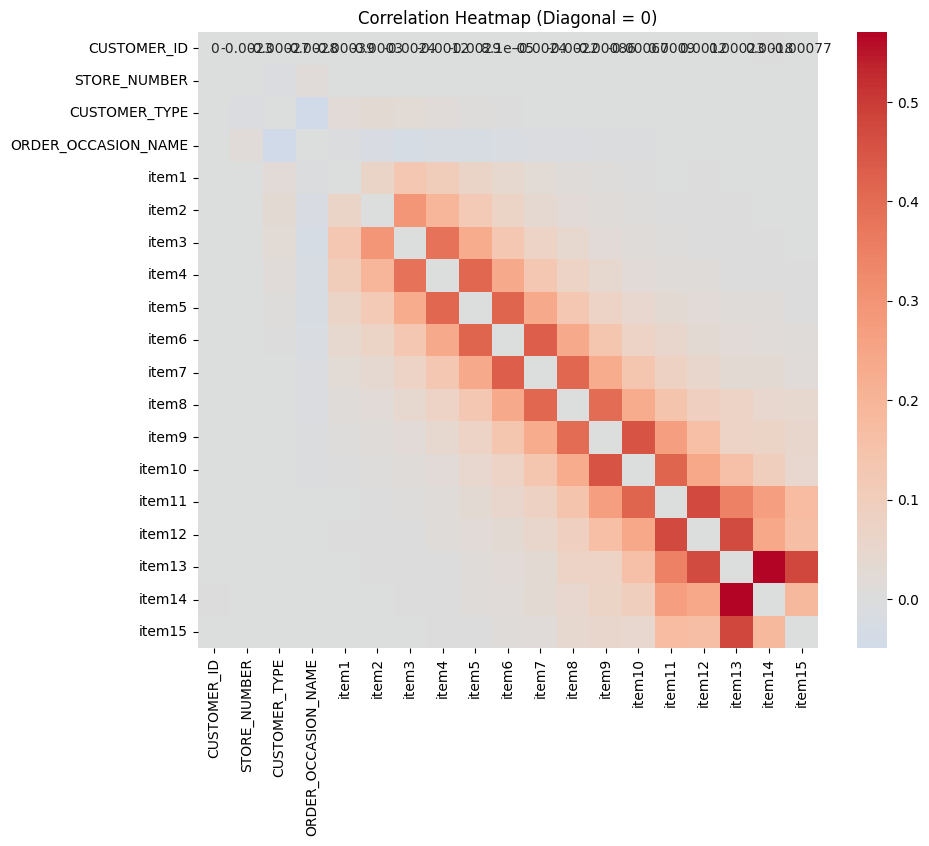

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create numerical copy for correlation
corr_data = merged_dataset_final.copy()

# Convert categorical columns to numerical using label encoding
corr_data = corr_data.apply(lambda col: col.astype('category').cat.codes
                            if col.dtypes == 'object' else col)

# Step 2: Calculate correlation matrix
corr_matrix = corr_data.corr()

# Assume corr_matrix is already calculated
for i in range(19):  # 19 columns
    corr_matrix.iat[i, i] = 0.0

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Diagonal = 0)")
plt.show()

### Step 62: Create visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create numerical copy for correlation
corr_data = merged_dataset_final.copy()

# Convert categorical columns to numerical using label encoding
corr_data = corr_data.apply(lambda col: col.astype('category').cat.codes
                            if col.dtypes == 'object' else col)

# Step 2: Calculate correlation matrix
corr_matrix = corr_data.corr()

# --- Output correlation matrix separately ---
print("Correlation Matrix:")
display(corr_matrix)

Correlation Matrix:


,CUSTOMER_ID,STORE_NUMBER,CUSTOMER_TYPE,ORDER_OCCASION_NAME,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15
CUSTOMER_ID,1.000000,-0.002314,-0.000274,-0.002824,-0.000393,-0.000300,-0.002422,-0.001217,-0.002890,0.000081,-0.002403,-0.002163,-0.000862,-0.000675,0.000901,0.001175,0.000233,0.001782,-0.000769
STORE_NUMBER,-0.002314,1.000000,-0.010289,0.015483,-0.002635,-0.002930,-0.000990,0.000436,0.000692,-0.000234,-0.000242,-0.000729,-0.001649,-0.000528,-0.000859,-0.000480,-0.000581,-0.000401,-0.000554
CUSTOMER_TYPE,-0.000274,-0.010289,1.000000,-0.049283,0.019993,0.029069,0.024068,0.015802,0.008490,0.002400,-0.000184,-0.000561,-0.000601,-0.001587,-0.001469,-0.001795,0.000056,0.000663,-0.001367
ORDER_OCCASION_NAME,-0.002824,0.015483,-0.049283,1.000000,-0.005382,-0.019081,-0.026571,-0.024006,-0.020386,-0.015604,-0.012090,-0.009978,-0.007040,-0.003900,-0.002318,-0.001296,0.000060,0.000490,-0.001722
item1,-0.000393,-0.002635,0.019993,-0.005382,1.000000,0.064170,0.132133,0.102676,0.066414,0.041574,0.024363,0.012642,0.008088,0.003880,0.000933,0.002059,0.000601,-0.000754,0.000765
item2,-0.000300,-0.002930,0.029069,-0.019081,0.064170,1.000000,0.297878,0.195976,0.118650,0.069601,0.038826,0.021596,0.011306,0.006818,0.005059,0.004145,0.001659,0.000696,-0.000112
item3,-0.002422,-0.000990,0.024068,-0.026571,0.132133,0.297878,1.000000,0.383276,0.228601,0.132141,0.075071,0.041248,0.021908,0.012900,0.008020,0.005316,0.004164,0.002769,-0.000082
item4,-0.001217,0.000436,0.015802,-0.024006,0.102676,0.195976,0.383276,1.000000,0.412046,0.238904,0.134498,0.074946,0.041500,0.022210,0.012234,0.009524,0.004887,0.005269,0.002422
item5,-0.002890,0.000692,0.008490,-0.020386,0.066414,0.118650,0.228601,0.412046,1.000000,0.417464,0.238596,0.134524,0.073403,0.045212,0.028362,0.020941,0.012498,0.008851,0.003421
item6,0.000081,-0.000234,0.002400,-0.015604,0.041574,0.069601,0.132141,0.238904,0.417464,1.000000,0.428188,0.236388,0.134804,0.071976,0.051693,0.031483,0.018763,0.017196,0.010308


### Step 63: Display dataset information

In [ ]:
merged_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410251 entries, 0 to 1410250
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   CUSTOMER_ID          1410251 non-null  int64 
 1   STORE_NUMBER         1410251 non-null  int64 
 2   CUSTOMER_TYPE        1410251 non-null  object
 3   ORDER_OCCASION_NAME  1410251 non-null  object
 4   item1                1410251 non-null  object
 5   item2                811982 non-null   object
 6   item3                372298 non-null   object
 7   item4                142776 non-null   object
 8   item5                49542 non-null    object
 9   item6                16104 non-null    object
 10  item7                5119 non-null     object
 11  item8                1604 non-null     object
 12  item9                507 non-null      object
 13  item10               185 non-null      object
 14  item11               73 non-null       object
 15  item12         

### Step 64: Code execution

In [ ]:
#pip install mlxtend

### Step 65: Modelling Data With FP-Growth Model and Validating With RECALL@3

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from tqdm import tqdm
import random
import numpy as np
from itertools import combinations

tqdm.pandas()

# ----------------
# Prepare items column if not already
if 'items' not in merged_dataset_final.columns:
    item_cols = [f"item{i}" for i in range(1, 16)]
    merged_dataset_final['items'] = merged_dataset_final[item_cols].progress_apply(
        lambda x: [i for i in x if pd.notnull(i)],
        axis=1
    )

# Shuffle and split
merged_dataset_final = merged_dataset_final.sample(frac=1, random_state=42).reset_index(drop=True)
train_split, val_split = 0.7, 0.15
n = len(merged_dataset_final)
train_df = merged_dataset_final.iloc[:int(train_split*n)]
val_df = merged_dataset_final.iloc[int(train_split*n):int((train_split+val_split)*n)]
test_df = merged_dataset_final.iloc[int((train_split+val_split)*n):]

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# Transaction encoding on train
print("\nEncoding transactions...")
te = TransactionEncoder()
te_ary = list(tqdm(te.fit(train_df['items']).transform(train_df['items']),
                   total=len(train_df),
                   desc="Transaction Encoding"))
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# Run FP-Growth
print("\nRunning FP-Growth...")
frequent_itemsets = fpgrowth(basket_df, min_support=0.001, use_colnames=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets")

# Generate association rules
print("\nGenerating association rules...")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules.sort_values(by='confidence', ascending=False)
print(f"Generated {len(rules)} association rules")

# Prediction function
def suggest_next_items(selected_items, rules, top_n=3):
    selected_items = set(selected_items)
    all_suggestions = {}

    for _, rule in rules.iterrows():
        if rule['antecedents'].issubset(selected_items):
            for consequent in rule['consequents']:
                if consequent not in selected_items:
                    all_suggestions[consequent] = max(all_suggestions.get(consequent, 0), rule['confidence'])

    sorted_suggestions = sorted(all_suggestions.items(), key=lambda item: item[1], reverse=True)
    return [item[0] for item in sorted_suggestions][:top_n]

# Sample validation suggestions for all 3-item combinations
sample_order = random.choice(val_df['items'].tolist())
if len(sample_order) >= 3:
    print("\nValidation suggestions for all possible 3-item combinations from the sample order:")
    for combo in tqdm(list(combinations(sample_order, 3)), desc="Generating sample predictions"):
        given_items = set(combo)
        suggestions = suggest_next_items(given_items, rules, top_n=3)
        print(f"Given items: {list(given_items)} --> Suggested next: {suggestions}")
else:
    print("Sample order had less than 3 items, skipping.")

# Evaluate on test set
print("\nEvaluating on test set...")
test_items_list = test_df['items'].tolist()

hits, cases = 0, 0
min_items_for_eval = 4  # Need at least 4 items for given 3 + actual

for items in tqdm(test_items_list, desc="Evaluating hit rate"):
    if len(items) < min_items_for_eval:
        continue
    given_items = set(items[:3])
    actual_items = set(items[3:])
    predicted_items = set(suggest_next_items(given_items, rules, top_n=3))
    if predicted_items & actual_items:
        hits += 1
    cases += 1

hit_rate = hits / cases if cases > 0 else 0
print(f"\nHit rate@3 (given 3 items): {hit_rate:.2%}")

100%|██████████| 1410251/1410251 [00:42<00:00, 33453.70it/s]


Train: 987175, Val: 211538, Test: 211538

Encoding transactions...


Transaction Encoding: 100%|██████████| 987175/987175 [00:00<00:00, 1278437.33it/s]



Running FP-Growth...
Found 518 frequent itemsets

Generating association rules...
Generated 276 association rules
Sample order had less than 3 items, skipping.

Evaluating on test set...


Evaluating hit rate: 100%|██████████| 211538/211538 [02:22<00:00, 1486.43it/s]


Hit rate@3 (given 3 items): 39.12%
